In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from fastai.vision.all import *
from pathlib import Path

c:\Users\levi\anaconda3\envs\pt\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
path = Path('../data')
os.chdir(path)

<AxesSubplot: xlabel='flower'>

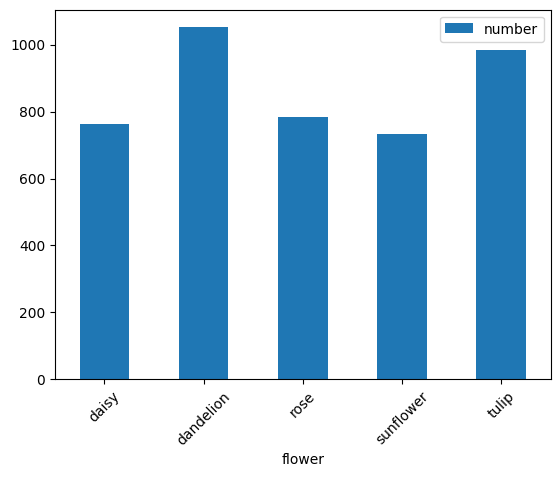

In [13]:
# check number of observations of every class


base_path = Path("./flowers")

infos = {'flower':[],
        'number':[]}

for folder in base_path.iterdir():
    if folder.is_dir():
        infos['flower'].append(folder.name)
        infos['number'].append(len(os.listdir(base_path/folder.name)))
        
pd.DataFrame(infos).set_index('flower').plot(kind='bar', rot=45)

apply albumentations

test_time agumentations


In [14]:
class AlbumentationsTransform(DisplayedTransform):
    split_idx,order=0,2
    def __init__(self, train_aug): store_attr()
    
    def encodes(self, img: PILImage):
        aug_img = self.train_aug(image=np.array(img))['image']
        return PILImage.create(aug_img)

In [15]:
import albumentations as A


def get_train_aug(): return A.Compose([
        A.RandomCrop(width=224, height=224),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
        A.HueSaturationValue(
            hue_shift_limit=0.2, 
            sat_shift_limit=0.2, 
            val_shift_limit=0.2, 
            p=0.5
        ),
        A.CoarseDropout(p=0.5),
        A.Cutout(p=0.5)
])

item_tfms = [Resize(224), AlbumentationsTransform(get_train_aug())]

c:\Users\levi\anaconda3\envs\pt\lib\site-packages\albumentations\augmentations\dropout\cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


In [16]:
dls = ImageDataLoaders.from_folder(path, get_image_files(path), item_tfms=item_tfms, valid_pct=0.2)


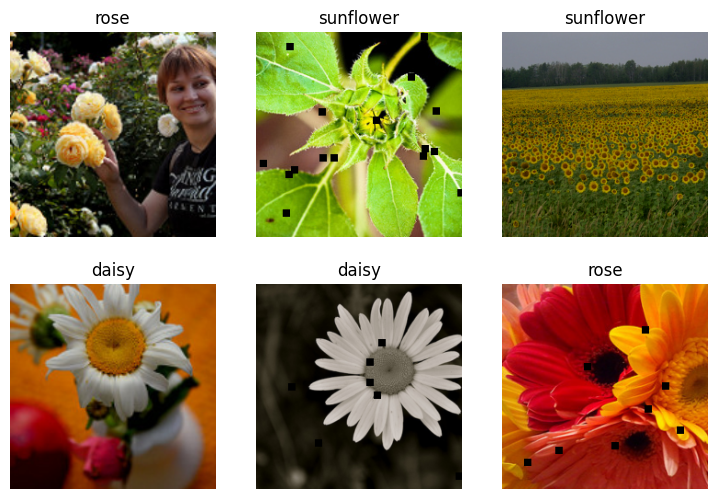

In [17]:
dls.show_batch(max_n= 6)

In [18]:
learn = vision_learner(dls, resnet34, metrics=[error_rate, accuracy])


c:\Users\levi\anaconda3\envs\pt\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\levi\anaconda3\envs\pt\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [19]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.064386,0.424326,0.139050,0.860950,01:41


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.468377,0.332086,0.101970,0.898030,01:08
1,0.323952,0.301809,0.082271,0.917729,01:03
2,0.214658,0.308622,0.076477,0.923523,00:58
3,0.124971,0.268453,0.069525,0.930475,01:02


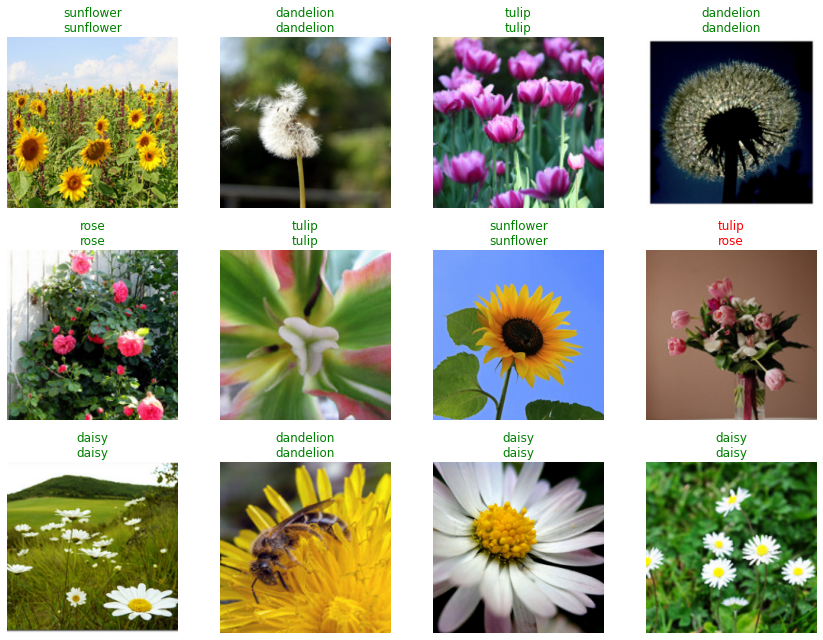

In [45]:
learn.show_results(max_n= 12)
plt.tight_layout()

In [ ]:
files = get_image_files(path)

In [46]:
learn.predict(files[0])

('dandelion',
 TensorBase(1),
 TensorBase([9.2225e-06, 9.9999e-01, 1.3050e-06, 9.0831e-07, 4.3875e-09]))

In [47]:
files[0]

Path('/kaggle/input/flowers-recognition/flowers/dandelion/34578947551_863af3acb3_n.jpg')

In [48]:
interp = Interpretation.from_learner(learn)


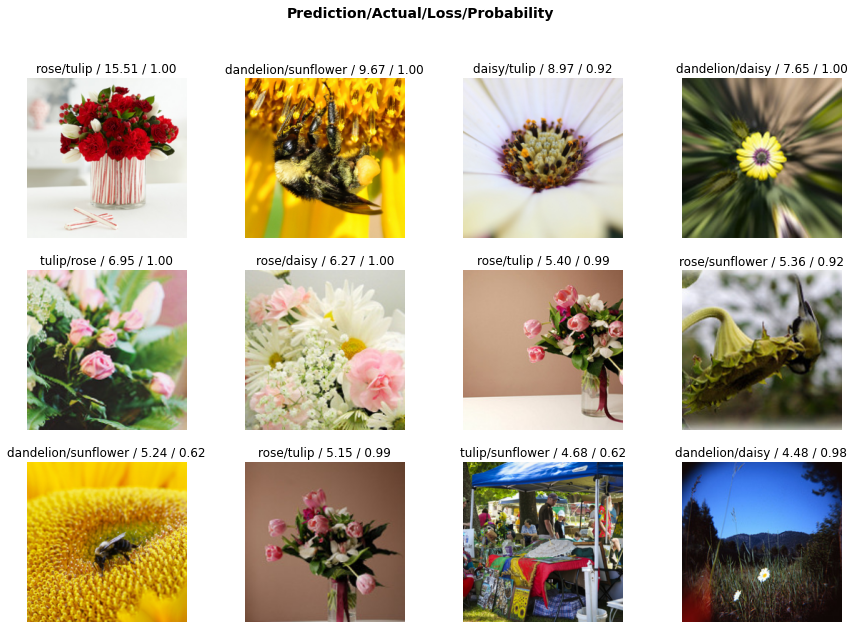

In [49]:
interp.plot_top_losses(12, figsize=(15,10))

gradcam

In [ ]:
interp.